# Gym Dataset

The dataset cointains the energy consumpion in KW of a gym.  
The consumption has been registered every hour on a period of time over 6 months.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

import pandas_profiling
from datetime import datetime

In [7]:
data = pd.read_csv("rec-center-hourly_out.csv", sep=",")

In [8]:
data.head()

,timestamp,kw_energy_consumption,prediction,anomaly_score,anomaly_likelihood
0,2010-07-02 00:00:00,21.2,21.2,1.0,0.5
1,2010-07-02 01:00:00,16.4,16.4,1.0,0.5
2,2010-07-02 02:00:00,4.7,4.7,1.0,0.5
3,2010-07-02 03:00:00,4.7,4.7,1.0,0.5
4,2010-07-02 04:00:00,4.6,4.6,1.0,0.5


In [9]:
data.tail()

,timestamp,kw_energy_consumption,prediction,anomaly_score,anomaly_likelihood
4386,2010-12-31 18:00:00,21.1,19.162911,0.000,0.860247
4387,2010-12-31 19:00:00,10.5,5.506965,0.150,0.714829
4388,2010-12-31 20:00:00,5.3,5.506965,0.125,0.555399
4389,2010-12-31 21:00:00,5.1,39.353417,0.100,0.580539
4390,2010-12-31 22:00:00,5.0,7.824440,0.050,0.646008


In [10]:
data.describe()

,kw_energy_consumption,prediction,anomaly_score,anomaly_likelihood
count,4391.000000,4391.000000,4391.000000,4391.000000
mean,31.304783,31.929570,0.046914,0.724870
std,19.638002,19.942975,0.122510,0.145901
min,4.400000,4.500000,0.000000,0.500000
25%,9.300000,8.400751,0.000000,0.599889
50%,37.700000,38.290916,0.025000,0.739968
75%,46.400000,46.285018,0.050000,0.831829
max,90.900000,72.688629,1.000000,1.000000


## Exploring our Time Series

In [11]:
ts = data[['timestamp', 'kw_energy_consumption']]

In [12]:
pandas_profiling.ProfileReport(data)

Number of variables,5
Number of observations,4391
Total Missing (%),0.0%
Total size in memory,171.6 KiB
Average record size in memory,40.0 B
Numeric,4
Categorical,0
Boolean,0
Date,0
Text (Unique),1
Rejected,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5026bc1050>]], dtype=object)

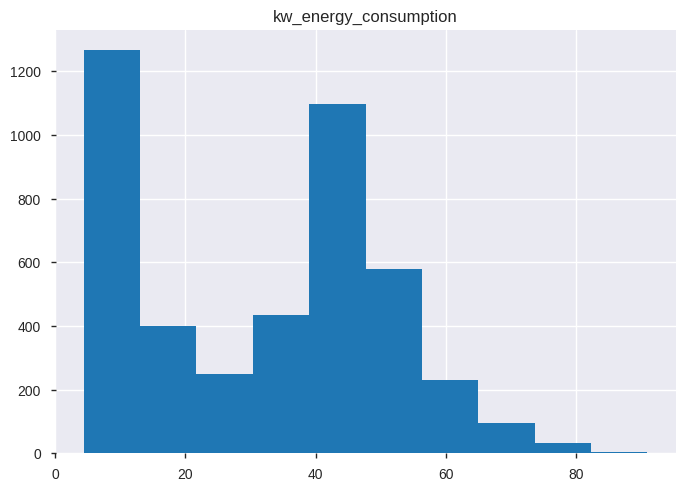

In [13]:
ts.hist()

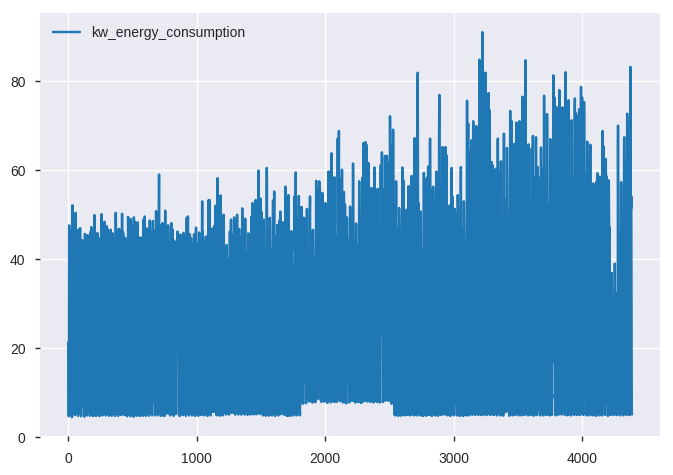

In [14]:
ts.plot()

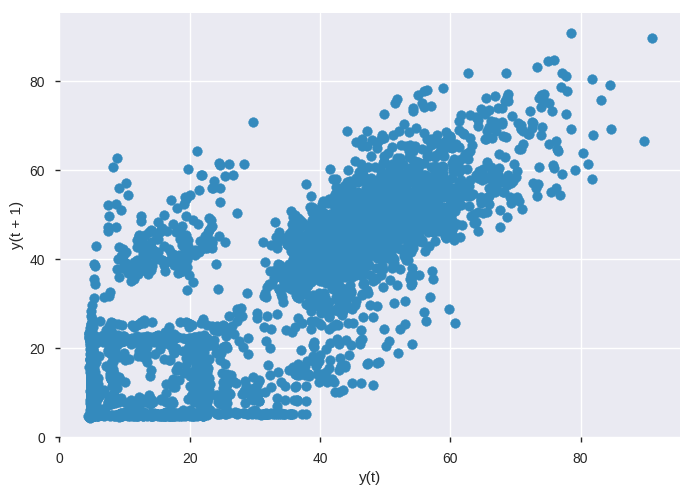

In [15]:
from pandas.plotting import lag_plot
lag_plot(ts.kw_energy_consumption)

**Correlation between observations and their lag1 values**: We can appreciate NOISE in the the data and that observations are positively correlated.

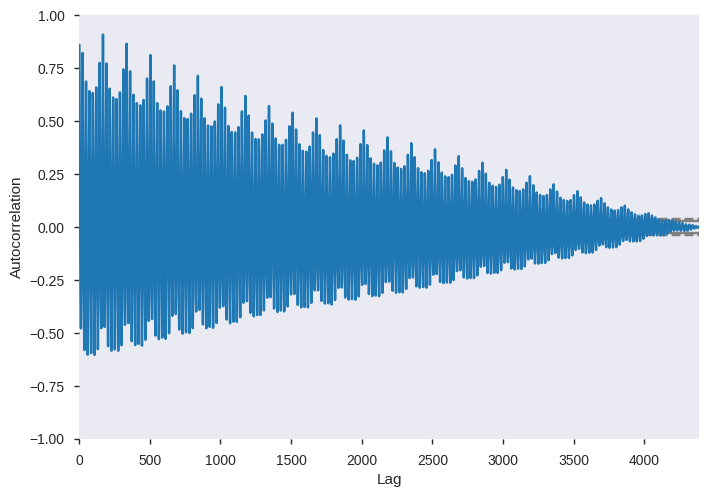

In [16]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(ts.kw_energy_consumption)

**Autocorrelation**: really high (as expected). We see cycles of strong negative and positive correlation. This captures the relationship of an observation with past observations in the same and opposite seasons or times of year. Sine waves like those seen in this example are a strong sign of seasonality in the dataset.

## Adding the Anomaly Score & LH

In [ ]:
**Defini**

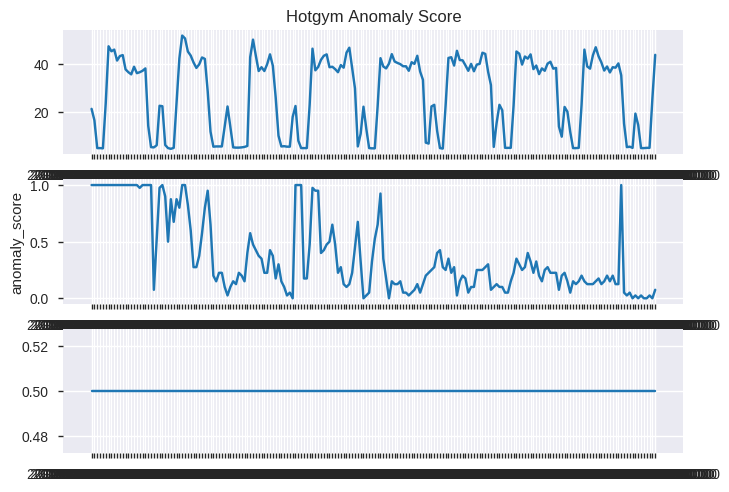

In [18]:
plt.figure(1)
plt.subplot(311)
plt.plot(data.timestamp[0:200], data.kw_energy_consumption[0:200])
plt.title('Hotgym Anomaly Score')
plt.xlabel('kw_consumption')

plt.subplot(312)
plt.plot(data.timestamp[0:200], data.anomaly_score.values[0:200])
plt.xlabel('time(h)')
plt.ylabel('anomaly_score')

plt.subplot(313)
plt.plot(data.timestamp[0:200], data.anomaly_likelihood[0:200])
plt.show()